/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL
===========iteration:0===========
SGD:2.4138839340131995
Momentum:2.2959420583878174
AdaGrad:2.29803176504433
Adam:2.196631133435959
===========iteration:100===========
SGD:1.7415068007149583
Momentum:0.22144249058337892
AdaGrad:0.1377192976509447
Adam:0.17237446530471534
===========iteration:200===========
SGD:0.9688838233138581
Momentum:0.32921543204086956
AdaGrad:0.10414431250464917
Adam:0.2573503883343516
===========iteration:300===========
SGD:0.5835249252273252
Momentum:0.21396634742128548
AdaGrad:0.1074047262708246
Adam:0.1346491796878143
===========iteration:400===========
SGD:0.3995031101559036
Momentum:0.17850551355600275
AdaGrad:0.10897337214749145
Adam:0.15591048542917801
===========iteration:500===========
SGD:0.4377267466424465
Momentum:0.20564860289977271
AdaGrad:0.09313392958139644
Adam:0.12966466733311588
===========iter

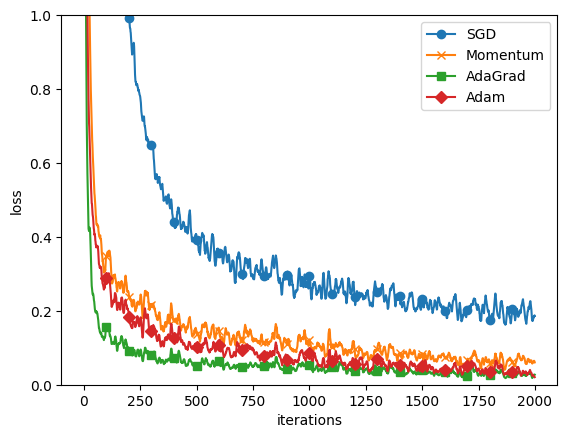

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
